# Root Finding in 1 Dimension
## Christina Lee
## Numerics

* Graph the function
* Make a graph of the function
* Make sure you have made a graph of the function

* Unknown multiplicity, or does multiplicity 2 even hit 
* many  roots
* pole

http://butler.cc.tut.fi/~piche/numa/lecture0506.pdf


* Midpoint Method
* Newton's Method
* Secant Method

In [1]:
using ForwardDiff
using Statistics
using Plots
gr()

Plots.GRBackend()

In [2]:
f(x) = 2*cos(x)-x+x^2/10

f (generic function with 1 method)

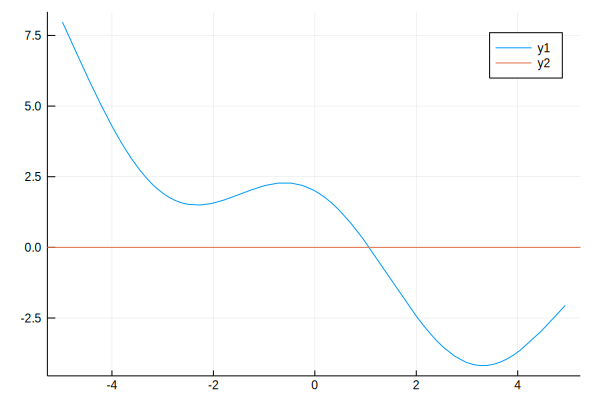

In [3]:
plot(f)
hline!([0])

In [14]:
function Zero_Iterator(f::Function,Method::Function,iterated_values::Array{Float64},params,N)
    
    n_values=zeros(Float64,length(iterated_values),N)
    n_values[:,1]=iterated_values;
    
    for ii in 2:N
        n_values[:,ii] = Method(f,n_values[:,(ii-1)],params)
    end
    return n_values
end


Zero_Iterator (generic function with 3 methods)

1.5

## Bracketing

<b> Pro </b>
    - Can't be worse than linear
<b> Con </b>
    - Only Linear

<b> Pitfalls </b>
    - Divergences

Bracketing will identify $x=0$ as a zero of $f(x) = 1/x$.  $1/0 \neq 0$, unless you are working in some weird sort of alternative algebra.  But the function alternative signs on either side, so that's good enough for the algorithm.  

In [16]:
function Midpoint(f::Function,endpoints::Array{Float64},params)
    if f(endpoints[1])*f(endpoints[2])>0
        println("Endpoints must bracket a zero.  Please pick better endpoints.")
        error()
    end
    c=mean(endpoints)
    if f(endpoints[1])*f(c)<0
        return [ endpoints[1],c]
        elseif f(c)*f(endpoints[2])<0
        return [c, endpoints[2]]
    else
        println("Mid point doesn't bracket a zero... somethign weird...")
    end
end

Midpoint (generic function with 2 methods)

In [7]:
xa=-1.
xb=2.
n=10

10

In [26]:

endpoints=Zero_Iterator(f,Midpoint,[xa,xb],["null"],n)
x_diff=endpoints[1,:]-endpoints[2,:];
y_diff=f.(endpoints[1,:])-f.(endpoints[2,:]);

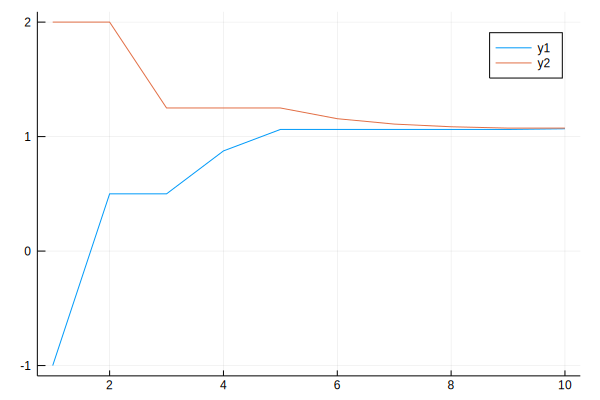

In [19]:
plot(endpoints[1,:])
plot!(endpoints[2,:])

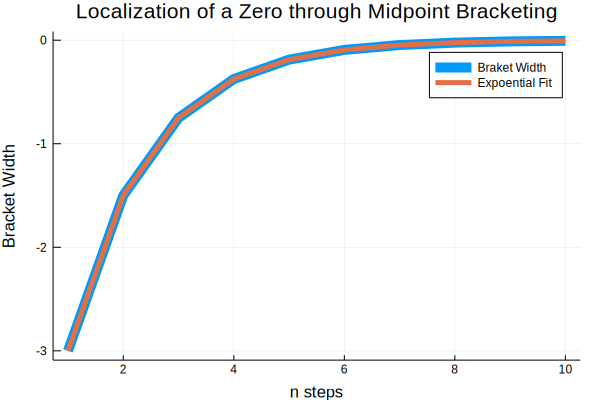

In [46]:
plot(x_diff,
    linewidth=10,label="Braket Width")
plot!( x_diff[1]*(2.).^(-collect(0:(n-1))) ,
    linewidth=5, label="Expoential Fit")

plot!(xlabel="n steps",ylabel="Bracket Width",title="Localization of a Zero through Midpoint Bracketing")


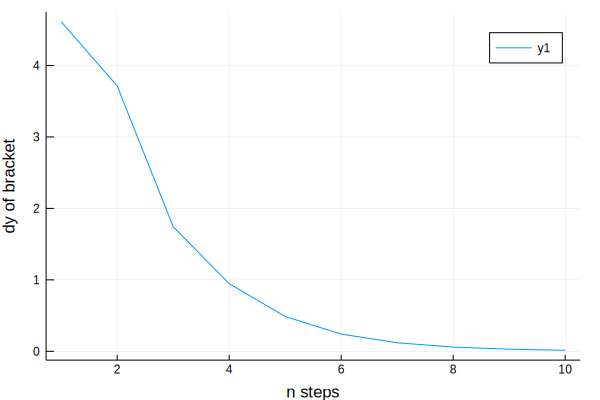

In [47]:
plot(y_diff)
plot!(xlabel="n steps", ylabel="dy of bracket")

## Newton's Method

In [51]:
function Newtons(f::Function,x::Array,fp::Array)
    return [ x[1]- f(x[1])/fp[1](x[1]) ]
end

Newtons (generic function with 1 method)

In [50]:
x0=2.

n=10

10

In [52]:
f_prep(x::Vector)=f(x[1])
f_prep2=(x->ForwardDiff.gradient(f_prep,x))
fp(x)=f_prep2(x .*[1.])[1]

1-element Array{typeof(fp),1}:
 fp

In [89]:
x_Newtons=transpose(Zero_Iterator(f,Newtons,[x0],[fp],n))
y_diff_N=f.(x_Newtons)
x_diff_N=x_Newtons.-x_Newtons[end]

10×1 Array{Float64,2}:
  0.9281352793610165   
 -0.07752867854505463  
  0.0010263761236100066
  1.5656622287529842e-7
  3.774758283725532e-15
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  

Hmmm... look at x_diff... little faster wouldn't you say? Didn't even have to run that many iterations to reach Float64 accuracy.

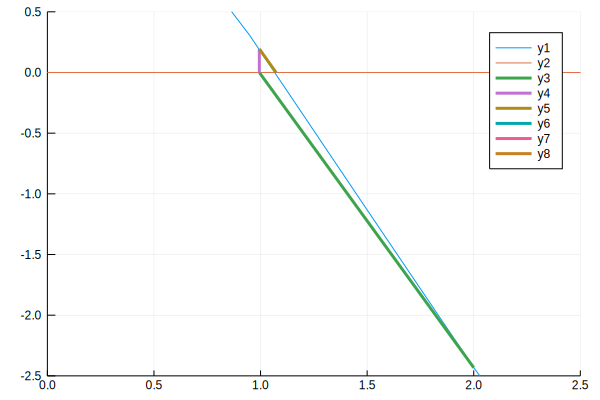

In [59]:
plot(f,
    xlims=(0,2.5),ylims=(-2.5,0.5))
hline!([0])

for ii in 1:3
    plot!(x_Newtons[(0:1).+ii],
        f(x_Newtons[ii]).+fp(x_Newtons[ii]).*(x_Newtons[(0:1).+ii].-x_Newtons[ii]),linewidth=3)
    plot!([x_Newtons[1+ii],x_Newtons[1+ii]],[0,f(x_Newtons[1+ii])],linewidth=3)
end
plot!()

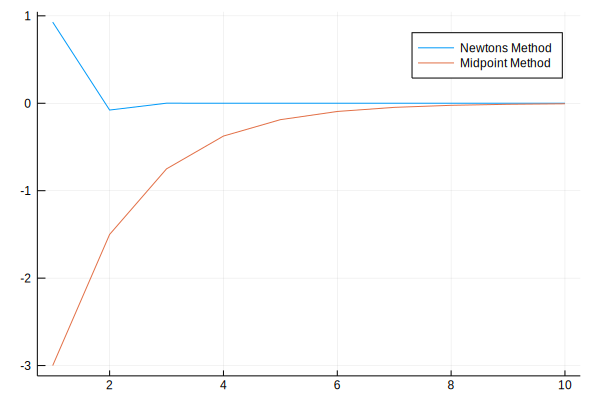

In [71]:
plot(x_diff_N,label="Newtons Method")
plot!(x_diff,label="Midpoint Method")

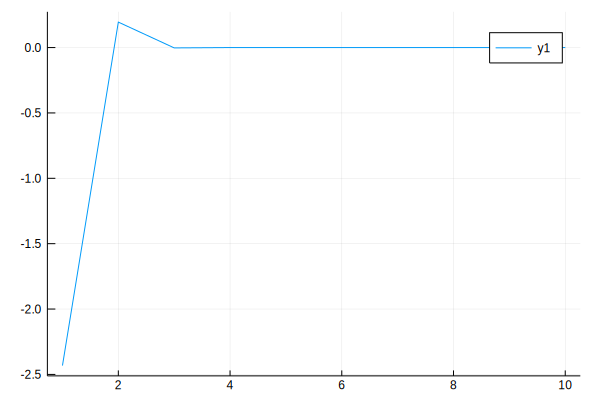

In [68]:
plot(y_diff_N)

## Secant Method

In [78]:
# x[1:2] are last two points
# x[2] more recent and x[1] older
# x[3:4] are f values of last two points
function Secant(f::Function,x::Array,params::Array)
    xnew= x[2] - x[4]*(x[2]-x[1])/(x[4]-x[3])
    return [x[2], xnew, x[4], f(xnew)]
end

Secant (generic function with 1 method)

In [74]:
x0=2.
x1=1.5

n=10

10

In [87]:
x_Secant=Zero_Iterator(f,Secant,[x0,x1,f(x0),f(x1)],["null"],n)
x_diff_S=x_Secant[2,:]-x_Secant[1,:]

  0.000038 seconds (72 allocations: 3.500 KiB)


10-element Array{Float64,1}:
  -0.5                   
  -0.4363849163049389    
   0.007916427022864214  
   0.0003336224830581269 
  -4.1258247596154263e-7 
   2.0476065287766687e-11
   0.0                   
 NaN                     
 NaN                     
 NaN                     

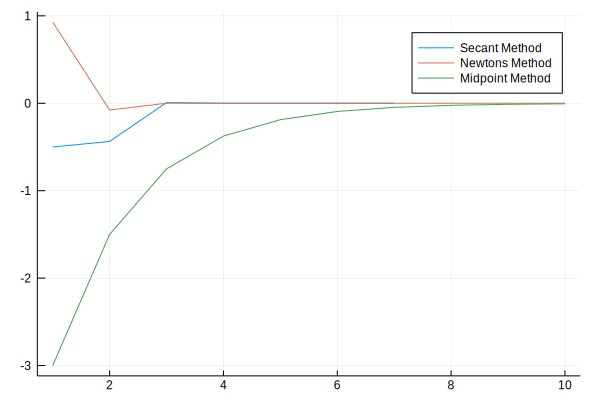

In [86]:
plot(x_diff_S,label="Secant Method")
plot!(x_diff_N,label="Newtons Method")
plot!(x_diff,label="Midpoint Method")

In [ ]:
plot(xNa)
plot!(xSa)